In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/immoweb_cleaned_2.csv")
data = data.set_index("id")
data.head(10)

,locality,type_of_property,subtype_of_property,price,nr_of_rooms,area,equiped_kitchen,open_fire,terrace,terrace_area,...,province,sq_m_price,sq_m_land_price,type_of_property_num,subtype_of_property_num,type_of_sale_num,equiped_kitchen_num,building_condition_num,region_num,province_num
id,,,,,,,,,,,,,,,,,,,,,
9044081,1083,APARTMENT,APARTMENT,265000,4,90,INSTALLED,0,1,13,...,BXL,2944.44,2572.82,1,1,1,1,1,0,1
9043978,1000,APARTMENT,APARTMENT,1795000,4,650,USA_HYPER_EQUIPPED,1,1,400,...,BXL,2761.54,1709.52,1,1,1,2,1,0,1
9041095,4860,HOUSE,HOUSE,320000,5,231,NOT_INSTALLED,0,1,30,...,WLG,1385.28,225.19,2,3,1,4,1,2,9
9043036,9600,APARTMENT,APARTMENT,195000,2,75,INSTALLED,0,0,-1,...,VOV,2600.00,2600.00,1,1,1,1,3,1,5
9042950,6010,APARTMENT,TRIPLEX,235000,3,149,HYPER_EQUIPPED,0,1,15,...,WHT,1577.18,1432.93,1,4,1,3,1,2,8
9042073,1070,APARTMENT,APARTMENT,320000,3,130,USA_HYPER_EQUIPPED,0,1,14,...,BXL,2461.54,2222.22,1,1,1,2,1,0,1
9042267,7181,HOUSE,VILLA,325000,2,130,INSTALLED,0,1,30,...,WHT,2500.00,311.60,2,5,1,1,4,2,8
9042511,5340,HOUSE,VILLA,569000,6,324,INSTALLED,0,1,57,...,WNA,1756.17,258.40,2,5,1,1,2,2,11
9034494,1950,APARTMENT,APARTMENT,715000,2,126,USA_HYPER_EQUIPPED,0,1,6,...,VBR,5674.60,5416.67,1,1,1,2,1,1,3


In [3]:
data.shape

(38574, 28)

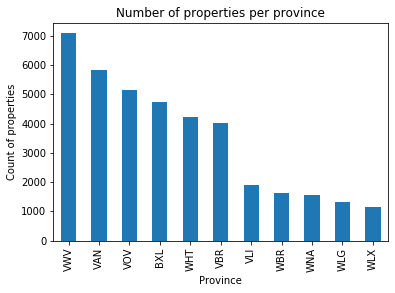

In [4]:
rep_province = data["province"].value_counts()
rep_province.plot(kind='bar')
plt.title("Number of properties per province")
plt.xlabel("Province")
plt.ylabel("Count of properties")
plt.show()

In [5]:
Wallonia = data.loc[data['region_num'] == 2]
Flandern = data.loc[data['region_num'] == 1]
Brussels = data.loc[data['region_num'] == 0]


## Belgium

In [6]:
corrMatrix = data.corr()

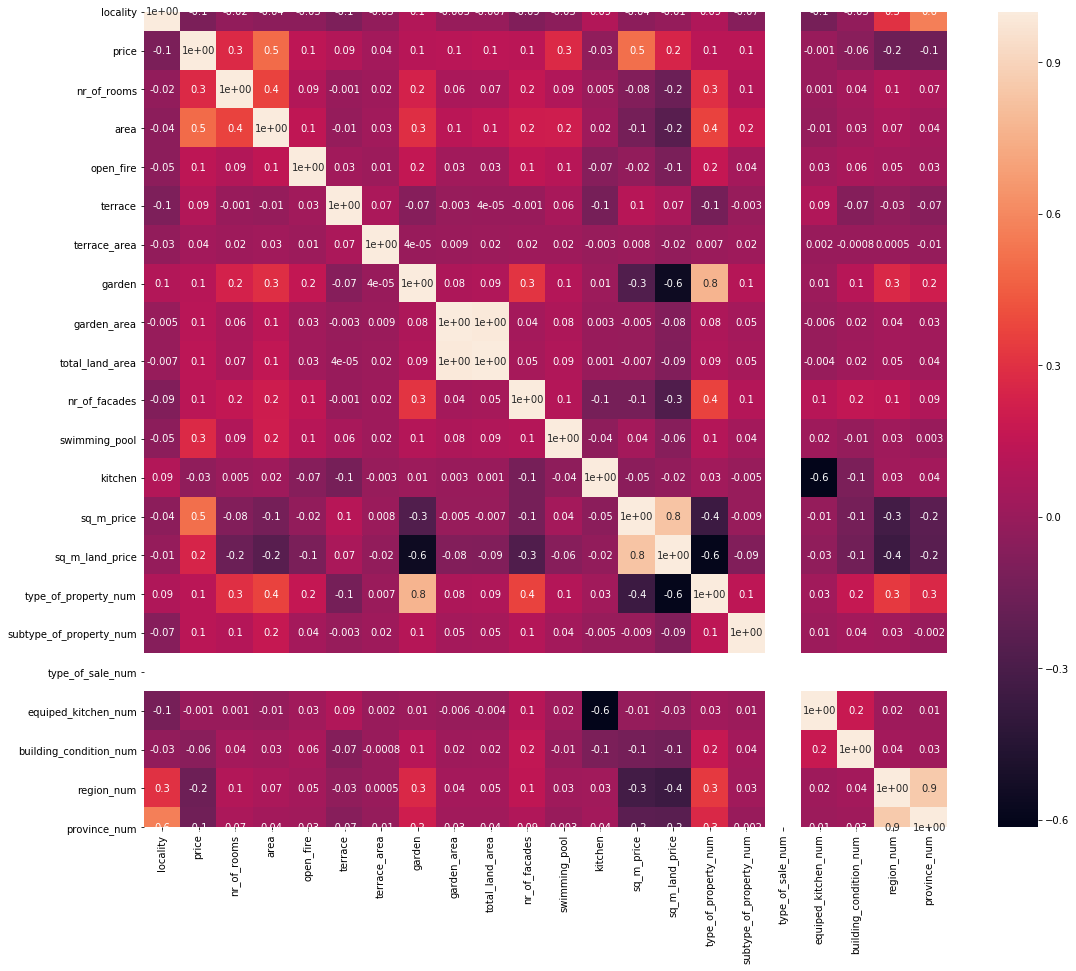

In [80]:
fig_dims = (18, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix, annot=True, fmt='.1', ax = ax)
plt.show()

Text(0, 0.5, 'Price')

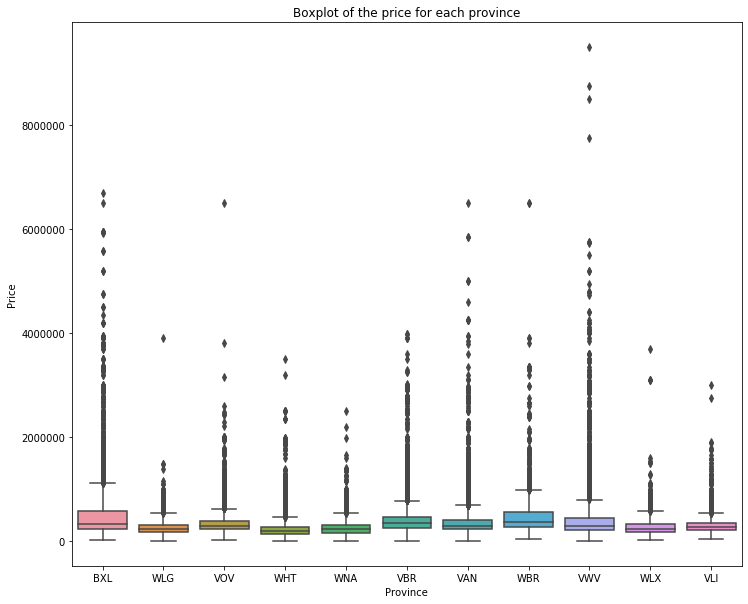

In [8]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=data,
               ax = ax) 
plt.title("Boxplot of the price for each province")
plt.xlabel("Province")
plt.ylabel("Price")
               

    
    

Text(0, 0.5, 'Price per square meter')

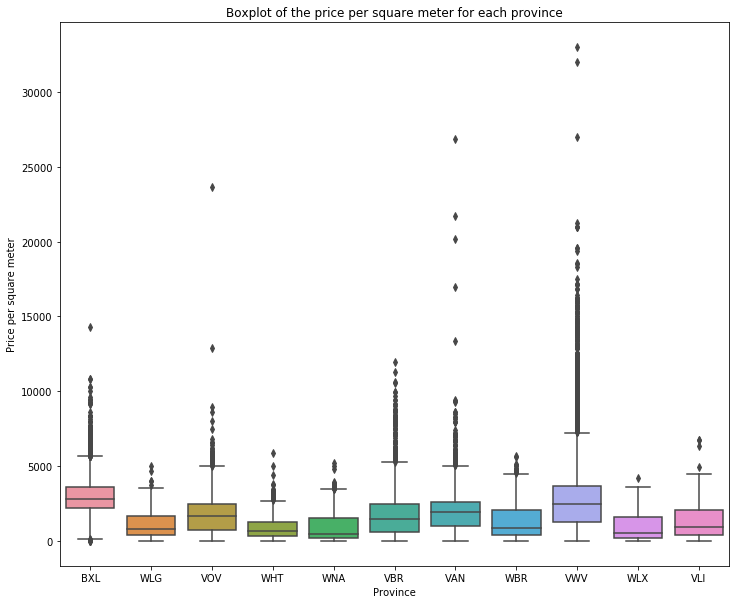

In [9]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='sq_m_land_price', 
               data=data,
               ax = ax) 
plt.title("Boxplot of the price per square meter for each province")
plt.xlabel("Province")
plt.ylabel("Price per square meter")




In [10]:
data.groupby('locality')['price'].mean().idxmax()
#9772 is Wannegem-Lede

6922

In [11]:
data.groupby('locality')['price'].mean().idxmin()
#6567 is Fontaine-Haute

6461

In [12]:
data.groupby('locality')['price'].median().idxmax()
#9772 is Wannegem-Lede

9772

In [13]:
data.groupby('locality')['price'].median().idxmin()
#6567 is Fontaine-Haute

6461

In [14]:
data.groupby('locality')['sq_m_land_price'].mean().idxmax()
#8300 is Knokke-Heist

8300

In [15]:
data.groupby('locality')['sq_m_land_price'].mean().idxmin()
#4608 is Dalhem

5362

### Only houses

In [16]:
Houses = data.loc[data['type_of_property_num'] == 2]

In [17]:
corrMatrix_house = Houses.corrwith(Houses["price"])
corrMatrix_house = pd.DataFrame(corrMatrix_house)

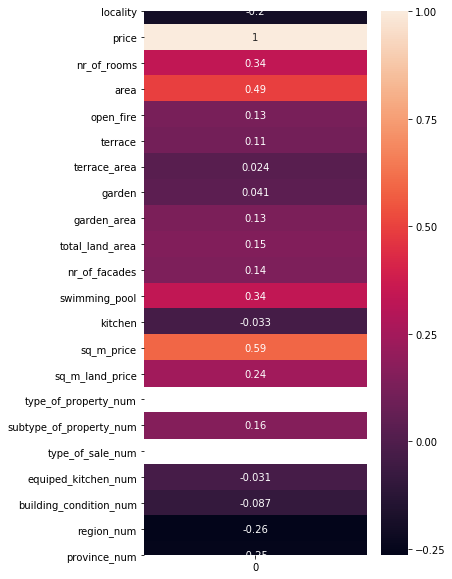

In [18]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_house, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

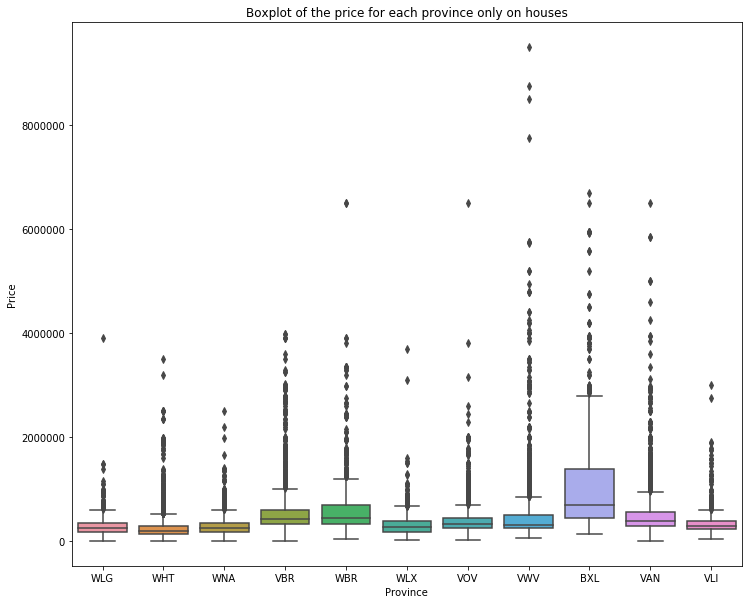

In [19]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Houses,
               ax = ax) 
plt.title("Boxplot of the price for each province only on houses")
plt.xlabel("Province")
plt.ylabel("Price")
               

Text(0, 0.5, 'Price per square meter')

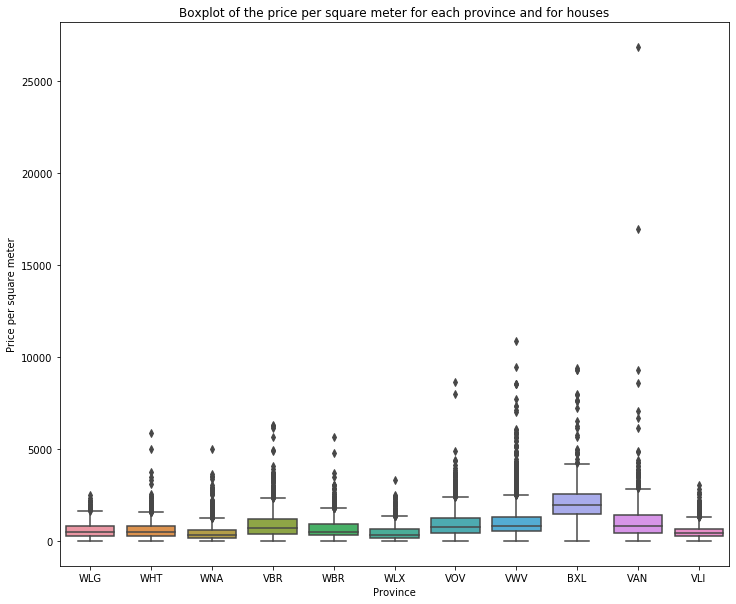

In [20]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='sq_m_land_price', 
               data=Houses,
               ax = ax) 
plt.title("Boxplot of the price per square meter for each province and for houses")
plt.xlabel("Province")
plt.ylabel("Price per square meter")
               

### Flats

In [21]:
Flat = data.loc[data['type_of_property_num'] == 1]

In [22]:
corrMatrix_flat = Flat.corrwith(Flat["price"])
corrMatrix_flat = pd.DataFrame(corrMatrix_flat)

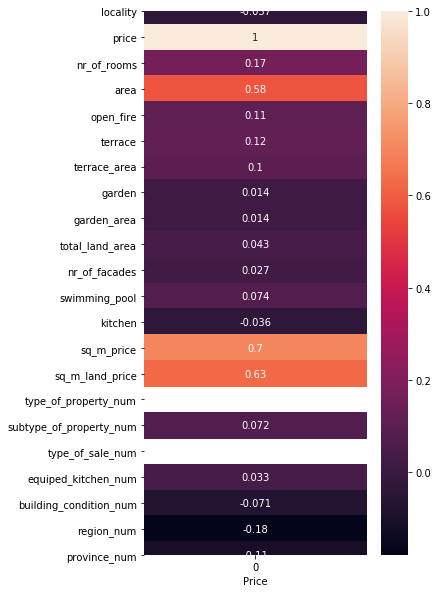

In [23]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_flat, annot=True, ax = ax)
plt.xlabel("Price")
plt.show()

Text(0, 0.5, 'Price')

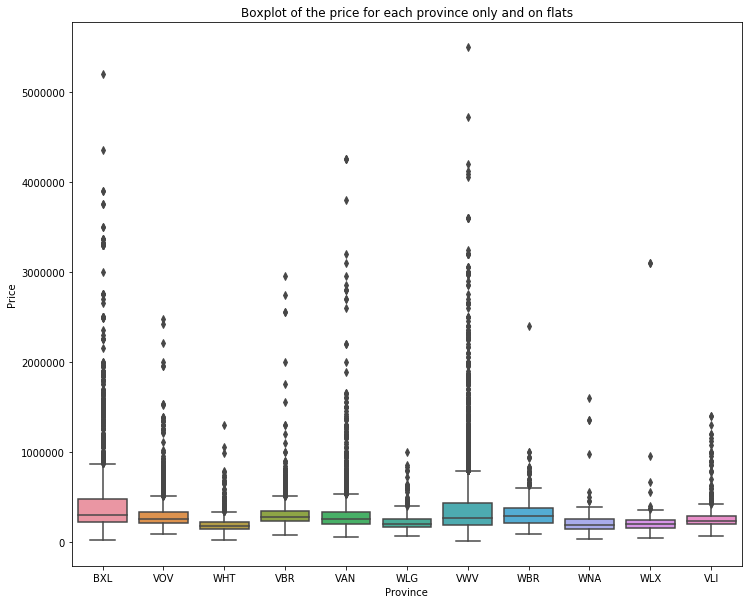

In [24]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Flat,
               ax = ax) 
plt.title("Boxplot of the price for each province only and on flats")
plt.xlabel("Province")
plt.ylabel("Price")

Text(0, 0.5, 'Price per square meter')

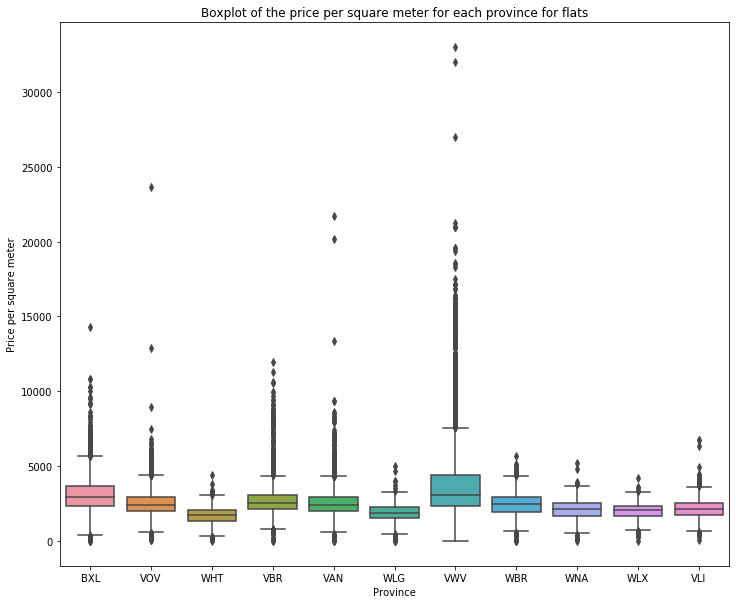

In [25]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='sq_m_land_price', 
               data=Flat,
               ax = ax) 
plt.title("Boxplot of the price per square meter for each province for flats")
plt.xlabel("Province")
plt.ylabel("Price per square meter")
               

## Wallonia

In [26]:
corrMatrix_wall = Wallonia.corrwith(Wallonia["price"])
corrMatrix_wall = pd.DataFrame(corrMatrix_wall)

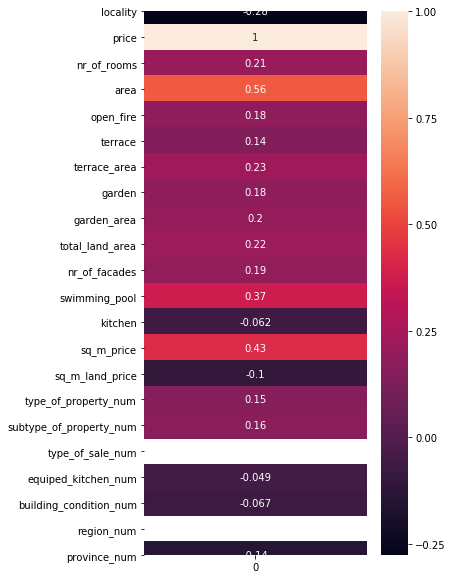

In [27]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_wall, annot=True, ax = ax)
plt.show()

In [28]:
Wallonia.groupby('locality')['price'].mean().idxmax()
#7133 is Buvrinnes

6922

In [29]:
Wallonia.groupby('locality')['price'].mean().idxmin()
#6567 is Fontaine-Haute 

6461

In [30]:
Wallonia.groupby('locality')['price'].median().idxmax()
#7133 is Buvrinnes

6922

In [31]:
Wallonia.groupby('locality')['price'].median().idxmin()
#6567 is Fontaine-Haute 

6461

In [32]:
Wallonia.groupby('locality')['sq_m_land_price'].mean().idxmax()
#5070 is Vitrival

7643

In [33]:
Wallonia.groupby('locality')['sq_m_land_price'].mean().idxmin()
#Awans

5362

### Only houses

In [34]:
Houses_wall = Wallonia.loc[data['type_of_property_num'] == 2]

In [35]:
corrMatrix_house_wall = Houses_wall.corrwith(Houses_wall["price"])
corrMatrix_house_wall = pd.DataFrame(corrMatrix_house_wall)

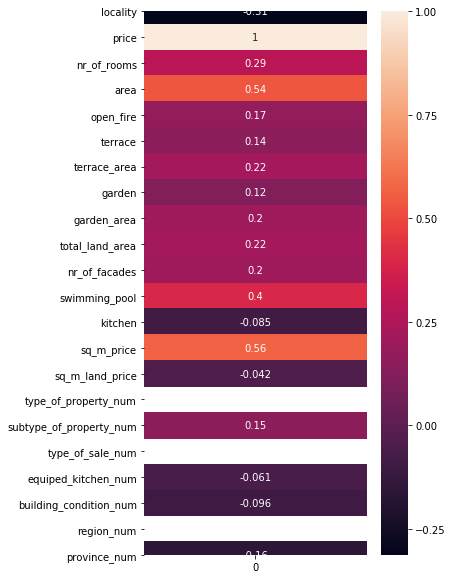

In [36]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_house_wall, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

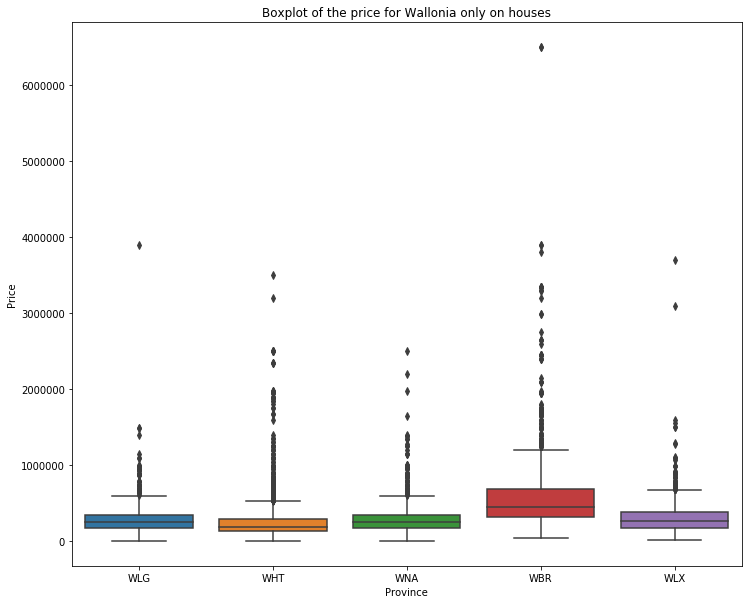

In [37]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Houses_wall,
               ax = ax) 
plt.title("Boxplot of the price for Wallonia only on houses")
plt.xlabel("Province")
plt.ylabel("Price")
               

Text(0, 0.5, 'Price per square meter')

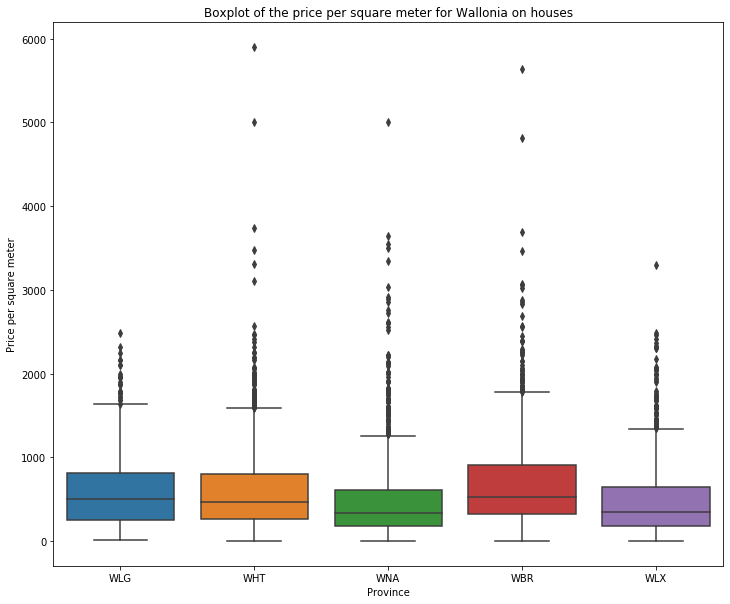

In [38]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='sq_m_land_price', 
               data=Houses_wall,
               ax = ax) 
plt.title("Boxplot of the price per square meter for Wallonia on houses")
plt.xlabel("Province")
plt.ylabel("Price per square meter")
               

### Only Flats

In [39]:
Flat_wall = Wallonia.loc[data['type_of_property_num'] == 1]

In [40]:
corrMatrix_flat_wall = Flat_wall.corrwith(Flat_wall["price"])
corrMatrix_flat_wall = pd.DataFrame(corrMatrix_flat_wall)

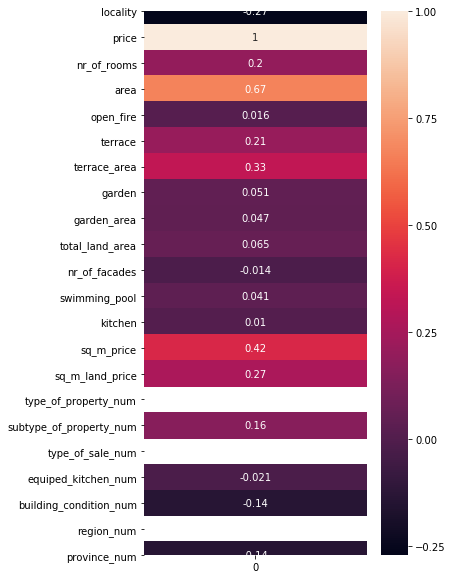

In [41]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_flat_wall, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

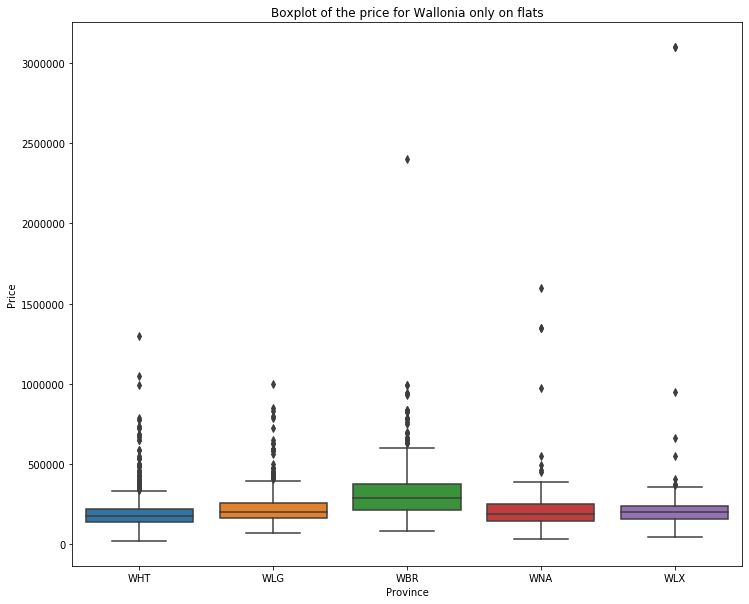

In [42]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Flat_wall,
               ax = ax) 
plt.title("Boxplot of the price for Wallonia only on flats")
plt.xlabel("Province")
plt.ylabel("Price")
               

Text(0, 0.5, 'Price per square meter')

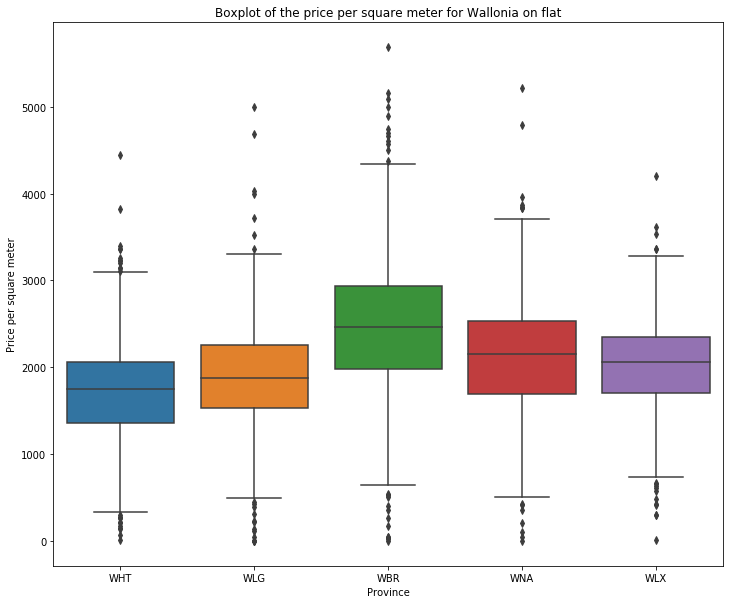

In [43]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='sq_m_land_price', 
               data=Flat_wall,
               ax = ax) 
plt.title("Boxplot of the price per square meter for Wallonia on flat")
plt.xlabel("Province")
plt.ylabel("Price per square meter")

## Flandern

In [44]:
corrMatrix_vla = Flandern.corrwith(Flandern["price"])
corrMatrix_vla = pd.DataFrame(corrMatrix_vla)

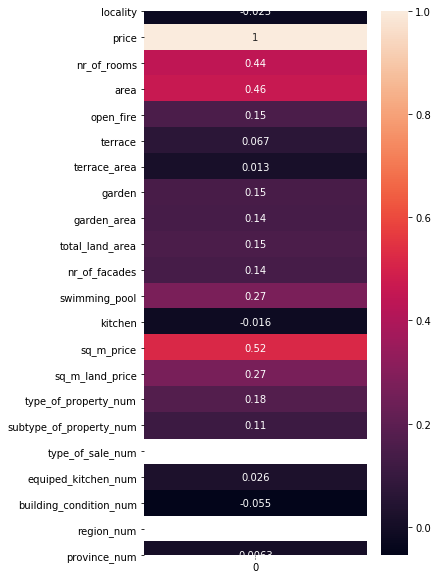

In [45]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_vla, annot=True, ax = ax)
plt.show()

In [46]:
Flandern.groupby('locality')['price'].mean().idxmax()
#9772 is Wannegem-Lede

9772

In [47]:
Flandern.groupby('locality')['price'].mean().idxmin() 
#8902 is Voormezele

3742

In [48]:
Flandern.groupby('locality')['price'].median().idxmax()
#9772 is Wannegem-Lede

9772

In [49]:
Flandern.groupby('locality')['price'].median().idxmin()
#8434 is Middelkerke

3742

In [50]:
Flandern.groupby('locality')['sq_m_land_price'].mean().idxmax()
#3071 is Kortenberg

8300

In [51]:
Flandern.groupby('locality')['sq_m_land_price'].mean().idxmin()
#3570 is Alken

9572

### Only Houses

In [52]:
Houses_vla = Flandern.loc[data['type_of_property_num'] == 2]

In [53]:
corrMatrix_house_vla = Houses_vla.corrwith(Houses_vla["price"])
corrMatrix_house_vla = pd.DataFrame(corrMatrix_house_vla)

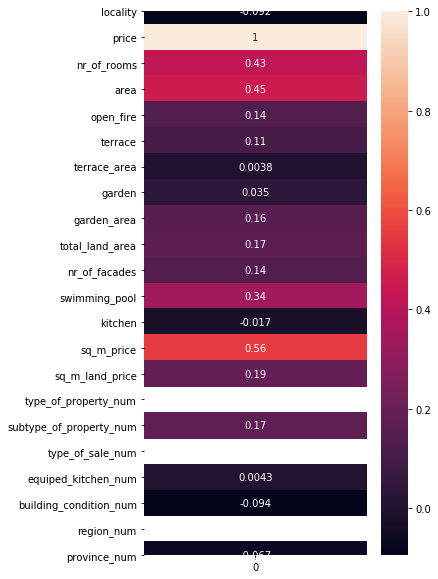

In [54]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_house_vla, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

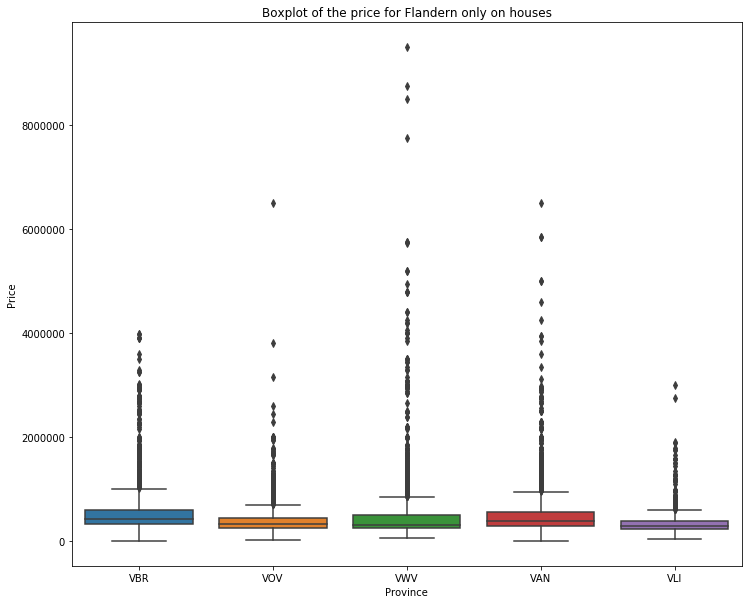

In [55]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Houses_vla,
               ax = ax) 
plt.title("Boxplot of the price for Flandern only on houses")
plt.xlabel("Province")
plt.ylabel("Price")

Text(0, 0.5, 'Price per square meter')

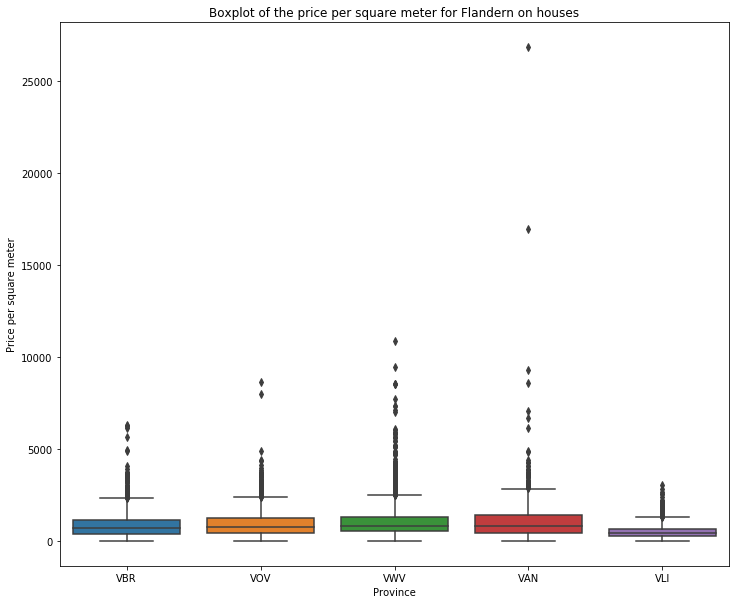

In [56]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='sq_m_land_price', 
               data=Houses_vla,
               ax = ax) 
plt.title("Boxplot of the price per square meter for Flandern on houses")
plt.xlabel("Province")
plt.ylabel("Price per square meter")

### Only Flats

In [57]:
Flat_vla = Flandern.loc[data['type_of_property_num'] == 1]

In [58]:
corrMatrix_flat_vla = Flat_vla.corrwith(Flat_vla["price"])
corrMatrix_flat_vla = pd.DataFrame(corrMatrix_flat_vla)

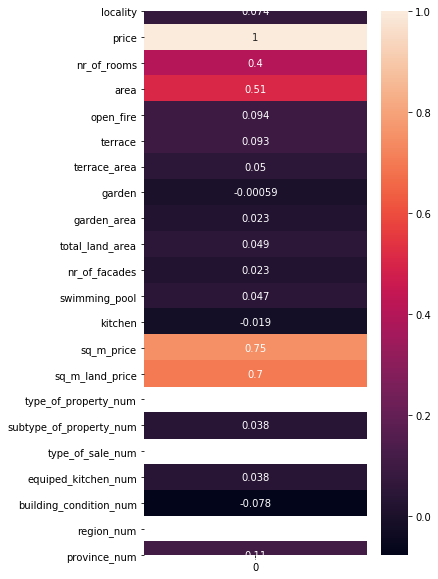

In [59]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_flat_vla, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

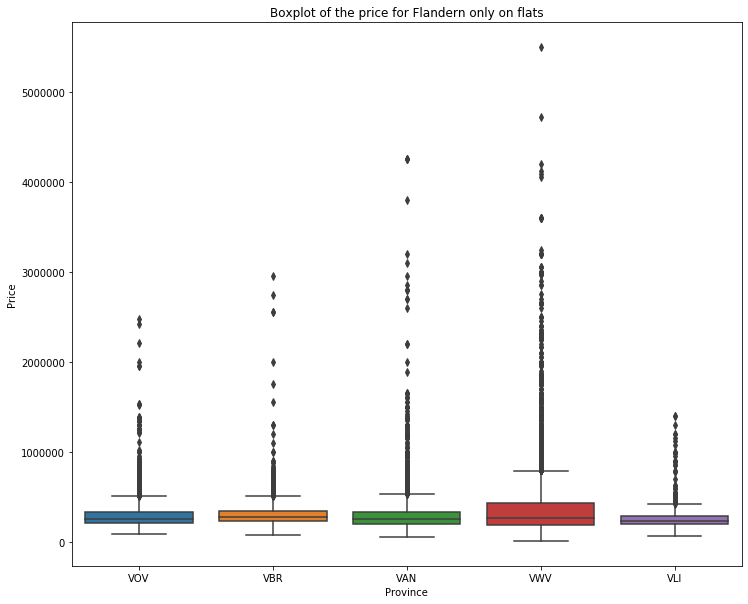

In [60]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Flat_vla,
               ax = ax) 
plt.title("Boxplot of the price for Flandern only on flats")
plt.xlabel("Province")
plt.ylabel("Price")

Text(0, 0.5, 'Price per square meter')

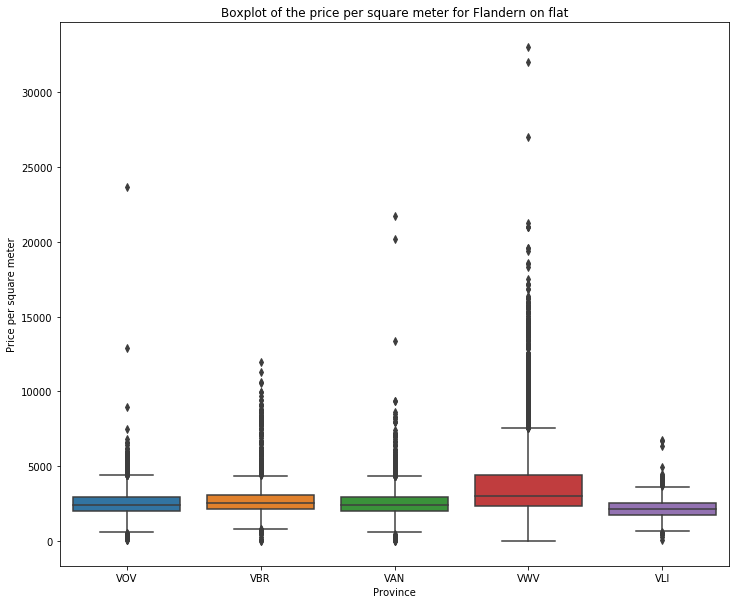

In [61]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='sq_m_land_price', 
               data=Flat_vla,
               ax = ax) 
plt.title("Boxplot of the price per square meter for Flandern on flat")
plt.xlabel("Province")
plt.ylabel("Price per square meter")

## Brussels 

In [62]:
corrMatrix_bru = Brussels.corrwith(Brussels["price"])
corrMatrix_bru = pd.DataFrame(corrMatrix_bru)

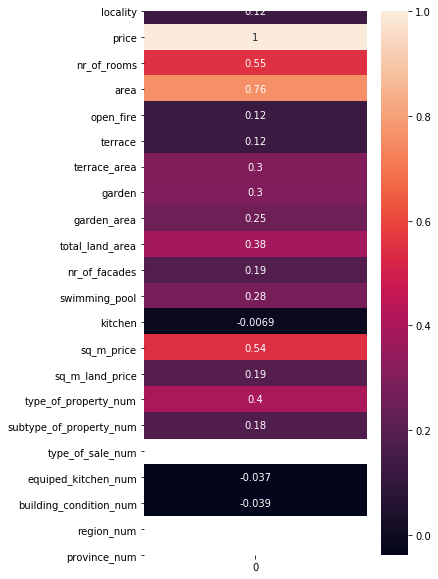

In [63]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_bru, annot=True, ax = ax)
plt.show()

In [64]:
Brussels.groupby('locality')['price'].mean().idxmax()
# 1150 is Woluwe-Saint-Pierre

1150

In [65]:
Brussels.groupby('locality')['price'].mean().idxmin()
#1081 is Koekelberg

1083

In [66]:
Brussels.groupby('locality')['price'].median().idxmax()
#1050 is Ixelles

1150

In [67]:
Brussels.groupby('locality')['price'].median().idxmin()
#1090 is Jette

1080

In [68]:
Brussels.groupby('locality')['sq_m_land_price'].mean().idxmax()
#1200 is Woluwe-Saint-Lambert

1050

In [69]:
Brussels.groupby('locality')['sq_m_land_price'].mean().idxmin()
#1090 is Jette

1080

### Only Houses

In [70]:
Houses_bxl = Brussels.loc[data['type_of_property_num'] == 2]

In [71]:
corrMatrix_house_bxl = Houses_bxl.corrwith(Houses_bxl["price"])
corrMatrix_house_bxl = pd.DataFrame(corrMatrix_house_bxl)

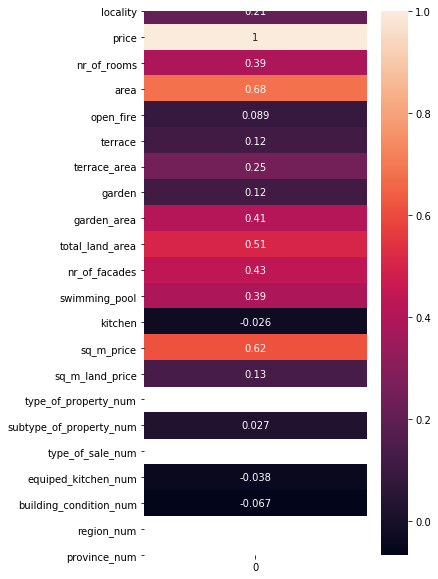

In [72]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_house_bxl, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

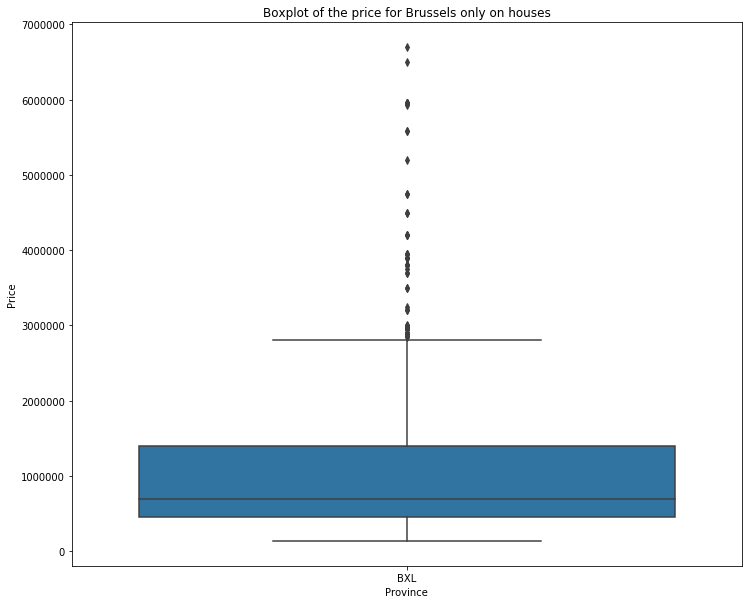

In [73]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Houses_bxl,
               ax = ax) 
plt.title("Boxplot of the price for Brussels only on houses")
plt.xlabel("Province")
plt.ylabel("Price")

Text(0, 0.5, 'Price per square meter')

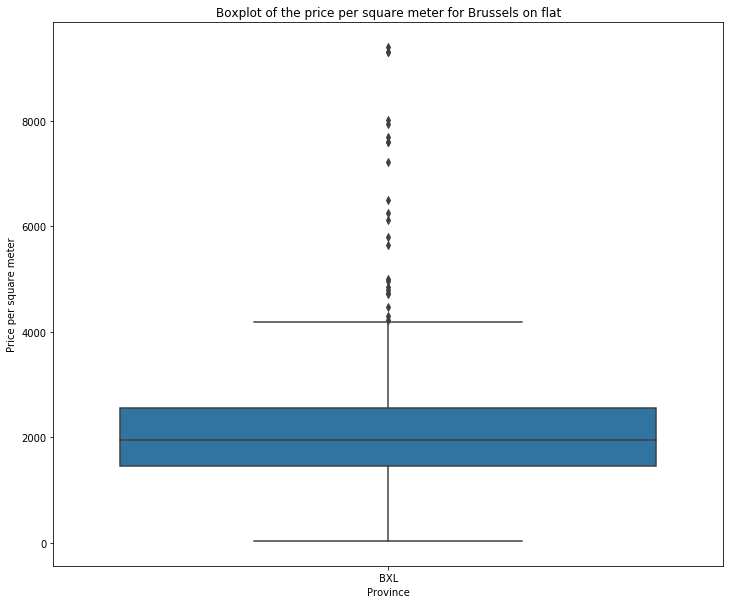

In [74]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='sq_m_land_price', 
               data=Houses_bxl,
               ax = ax) 
plt.title("Boxplot of the price per square meter for Brussels on flat")
plt.xlabel("Province")
plt.ylabel("Price per square meter")

### Only Flats

In [75]:
Flat_bxl = Brussels.loc[data['type_of_property_num'] == 1]

In [76]:
corrMatrix_flat_bxl = Flat_bxl.corrwith(Flat_bxl["price"])
corrMatrix_flat_bxl = pd.DataFrame(corrMatrix_flat_bxl)

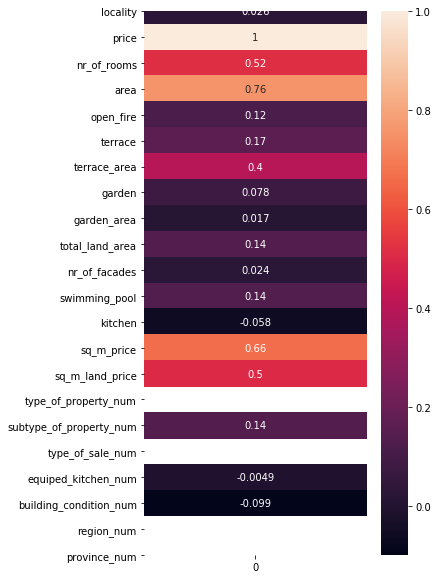

In [77]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_flat_bxl, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

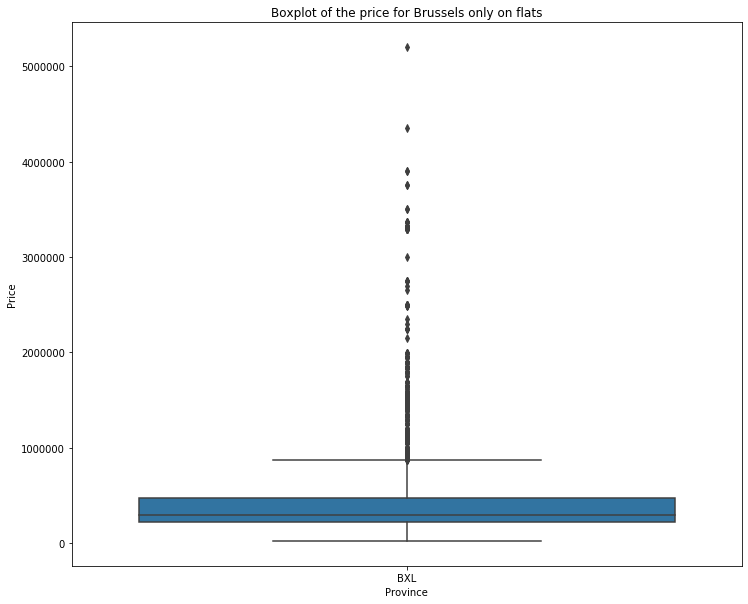

In [78]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Flat_bxl,
               ax = ax) 
plt.title("Boxplot of the price for Brussels only on flats")
plt.xlabel("Province")
plt.ylabel("Price")

Text(0, 0.5, 'Price per square meter')

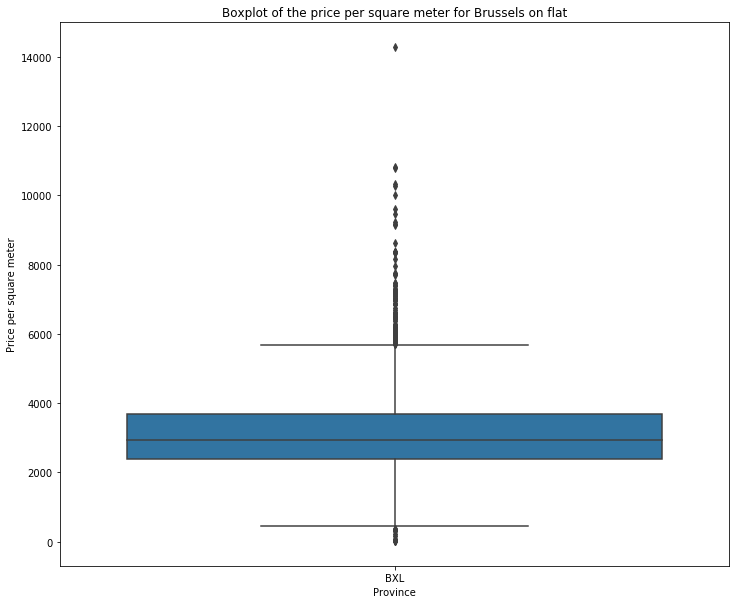

In [79]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='sq_m_land_price', 
               data=Flat_bxl,
               ax = ax) 
plt.title("Boxplot of the price per square meter for Brussels on flat")
plt.xlabel("Province")
plt.ylabel("Price per square meter")